<a href="https://colab.research.google.com/github/JulioHenri/projeto_cacimba/blob/main/marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


# Carregando e lendo os dados 

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_name = pd.read_csv('product_category_name_translation.csv')


<ipython-input-2-9d5c980b4283>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  geolocation = pd.read_csv('olist_geolocation_dataset.csv')


## Customers

In [3]:
customers.head() #cada registro é um cliente

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.duplicated(['customer_id']).sum() #verificando se há duplicatas

0

In [5]:
customers.duplicated(['customer_unique_id']).sum() #verificando se há duplicatas

3345

O customer_id tá ok e o unique_id tem valores repetidos, logo, não iremos levar em consideração o unique id.

## Geolocation

In [6]:
geolocation.head() #cada registro traz uma latitude ou longitude diferentes

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.64482,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
geolocation.duplicated(['geolocation_zip_code_prefix']).sum() #verificando se há duplicatas

322509

há duplicatas que variam só na latitude e longitude. Isso pouco importa num banco de localização, o que nos interessa é o CEP, sua respectiva cidade e estado. Logo, irei excluir os registros que contenham cep iguais e manter o primeiro registro que aparecer no banco.

In [8]:
geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

## Order items

In [9]:
order_items.head() #cada registro é um item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_items.shape #quantidade de linhas e colunas no dataframe

(112650, 7)

In [11]:
order_items.duplicated(['order_id']).sum() #verificando se há duplicatas

13984

In [12]:
items_duplicates = order_items[order_items.order_id.duplicated()]
items_duplicates.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78
76,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90
81,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,44.90,7.16
88,003324c70b19a16798817b2b3640e721,2,2b939dc9b176d7fa21594d588815d4a4,dbc22125167c298ef99da25668e1011f,2017-05-24 19:22:34,102.90,14.45
92,00337fe25a3780b3424d9ad7c5a4b35e,2,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.90,9.94


In [13]:
order_items = order_items.drop_duplicates(subset=['order_id'], keep='first') #excluindo as duplicatas

o que varia entre os pedidos duplicados é a variável 'order_item_id'. Apesar de ter esse nome, não me parece um id.

Soluções:
- Ignorar essa variável e dropar todos os pedidos duplicados. 
- Ignorar as duplicatas e seguir as análises.

Posteriormente quando eu for juntas os dataframes, estar com valores duplicados ou não vai ter um impacto e talvez enviesar os resultados futuros, devido a isso, exclui as duplicatas.

## Order Payments

In [14]:
order_payments.head() #cada registro é um pedido

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
order_payments.duplicated(['order_id']).sum() #verificando se há duplicatas

4446

Da mesma maneira que antes, encontrei duplicatas em um banco de dados que deveria ter um único pedido por linha e suas respectivas informações de pagamento.

In [16]:
items_duplicates = order_payments[order_payments.order_id.duplicated()] #retorna linhas exatamente iguais em todas as variáveis
items_duplicates.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
2707,1be51feefcd481bee3118900e6777057,3,voucher,1,8.77
2874,a3a97bc6e236d5351537c8f466c34dad,5,voucher,1,6.09
3256,370e2e6c1a9fd451eb7f0852daa3b006,11,voucher,1,6.49
3497,4a686b47e7eecbd136617bf8ae7c9af4,3,voucher,1,16.63
3507,370e2e6c1a9fd451eb7f0852daa3b006,1,credit_card,1,38.58


In [17]:
order_payments = order_payments.drop_duplicates(subset=['order_id'], keep='first') #excluindo as duplicatas

## Order reviews

In [18]:
order_reviews.head() 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
order_reviews.duplicated(['order_id']).sum() #verificando se há duplicatas

551

In [20]:
order_reviews = order_reviews.drop_duplicates(subset=['review_id'], keep='first') #excluindo as duplicatas

## orders

In [21]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
orders.duplicated(['order_id']).sum() #verificando se há duplicatas

0

## Products

In [23]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [24]:
products.duplicated(['product_id']).sum() #verificando se há duplicatas

0

## Sellers

In [25]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [26]:
sellers.duplicated(['seller_id']).sum() #verificando se há duplicatas

0

## Category name

In [27]:
category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [28]:
category_name.duplicated(['product_category_name']).sum() #verificando se há duplicatas

0

# Join dataframes

In [29]:
temp = pd.merge(order_items, order_payments, on='order_id', how='inner')
temp.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
98660,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,343.40
98661,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,386.53
98662,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,116.85
98663,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,64.71
98664,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,1,credit_card,1,55.79


In [30]:
temp.shape #quantidade de linhas e colunas

(98665, 11)

In [31]:
order_items.shape #quantidade de linhas e colunas

(98666, 7)

In [32]:
order_payments.shape #quantidade de linhas e colunas

(99440, 5)

In [33]:
temp = pd.merge(temp, order_reviews, on='order_id', how='inner')
orders = pd.merge(temp, orders, on='order_id', how='inner')
geral = pd.merge(orders, customers, on='customer_id', how='inner')
geral = pd.merge(geral, sellers, on='seller_id', how='inner')
geral = pd.merge(geral, products, on='product_id', how='inner')
geral = pd.merge(geral, category_name, on='product_category_name', how='inner')

pd.set_option('display.max_columns', None)
geral.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,72.19,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [34]:
geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96263 entries, 0 to 96262
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96263 non-null  object 
 1   order_item_id                  96263 non-null  int64  
 2   product_id                     96263 non-null  object 
 3   seller_id                      96263 non-null  object 
 4   shipping_limit_date            96263 non-null  object 
 5   price                          96263 non-null  float64
 6   freight_value                  96263 non-null  float64
 7   payment_sequential             96263 non-null  int64  
 8   payment_type                   96263 non-null  object 
 9   payment_installments           96263 non-null  int64  
 10  payment_value                  96263 non-null  float64
 11  review_id                      96263 non-null  object 
 12  review_score                   96263 non-null 

In [35]:
geral.describe() #principais medidas estatísticas pras variáveis "quantitativas"

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,96263.0,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96263.000000,96262.000000,96262.000000,96262.000000,96262.000000
mean,1.0,125.892583,20.234384,1.022626,2.918806,157.957306,4.109409,35161.494385,24695.320913,48.847512,794.315885,2.251727,2104.950043,30.143702,16.504363,23.056388
std,0.0,189.656841,15.942483,0.249008,2.712153,216.708516,1.327537,29809.721478,27760.321769,9.997834,654.568481,1.748788,3764.606369,16.158027,13.334704,11.740693
min,1.0,0.850000,0.000000,1.000000,0.000000,0.010000,1.000000,1003.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.0,41.900000,13.330000,1.000000,1.000000,60.050000,4.000000,11355.000000,6429.000000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.0,79.000000,16.390000,1.000000,2.000000,103.240000,5.000000,24425.000000,13660.000000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,1.0,139.900000,21.280000,1.000000,4.000000,175.480000,5.000000,59010.000000,29156.000000,57.000000,997.500000,3.000000,1813.000000,38.000000,20.000000,30.000000
max,1.0,6735.000000,409.680000,27.000000,24.000000,13664.080000,5.000000,99980.000000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# EDA - Exploratory data analysis

## Detecção de anomalias

Por meio de gráficos

In [36]:
quali = geral[['payment_type','order_status','customer_state']] #variáveis qualitativas interessantes
quanti = geral[['price','freight_value','payment_value','review_score']] #variáveis quantitativas interessantes

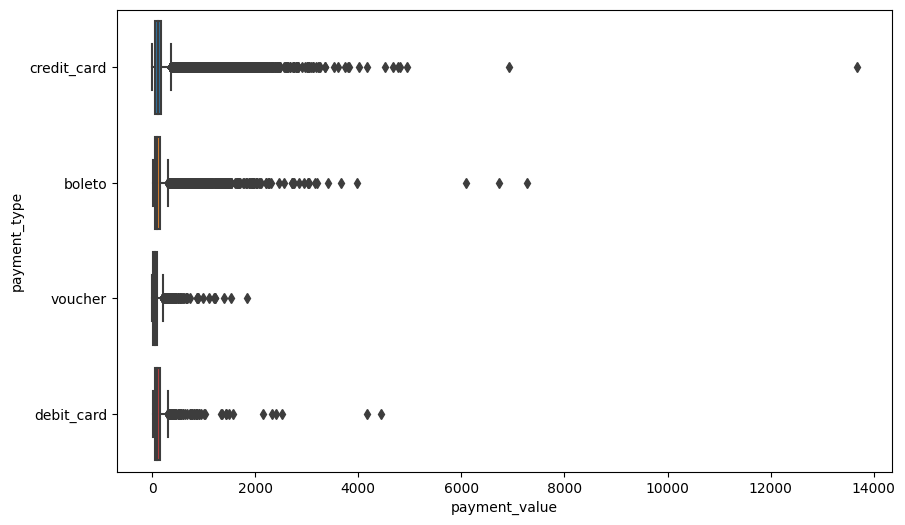

In [37]:
ax = sns.boxplot(x="payment_value",y = 'payment_type', data=geral)
ax.figure.set_size_inches(10, 6)

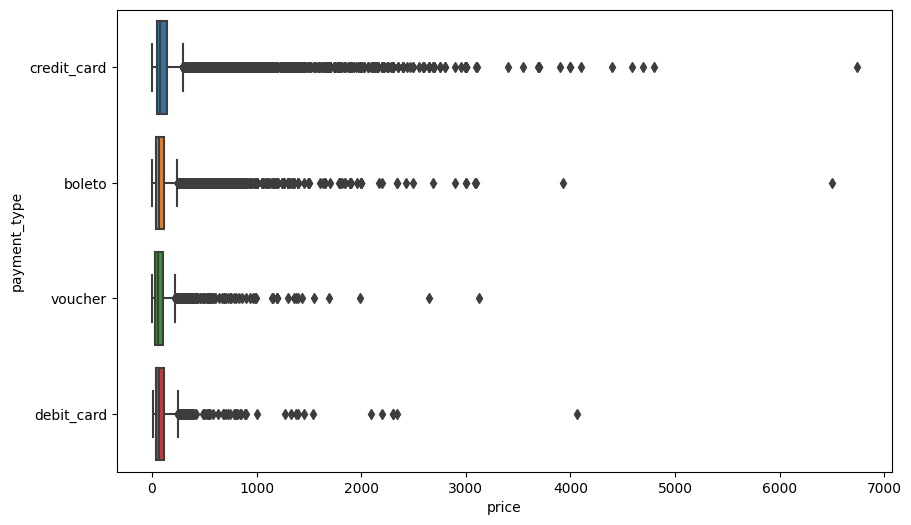

In [38]:
ax = sns.boxplot(x="price",y = 'payment_type', data=geral)
ax.figure.set_size_inches(10, 6)

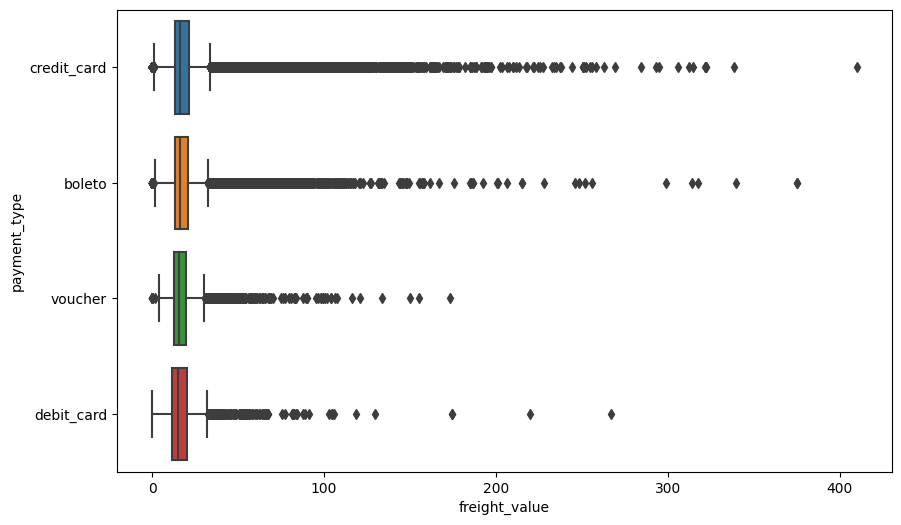

In [39]:
ax = sns.boxplot(x="freight_value",y = 'payment_type', data=geral)
ax.figure.set_size_inches(10, 6)

Histogramas

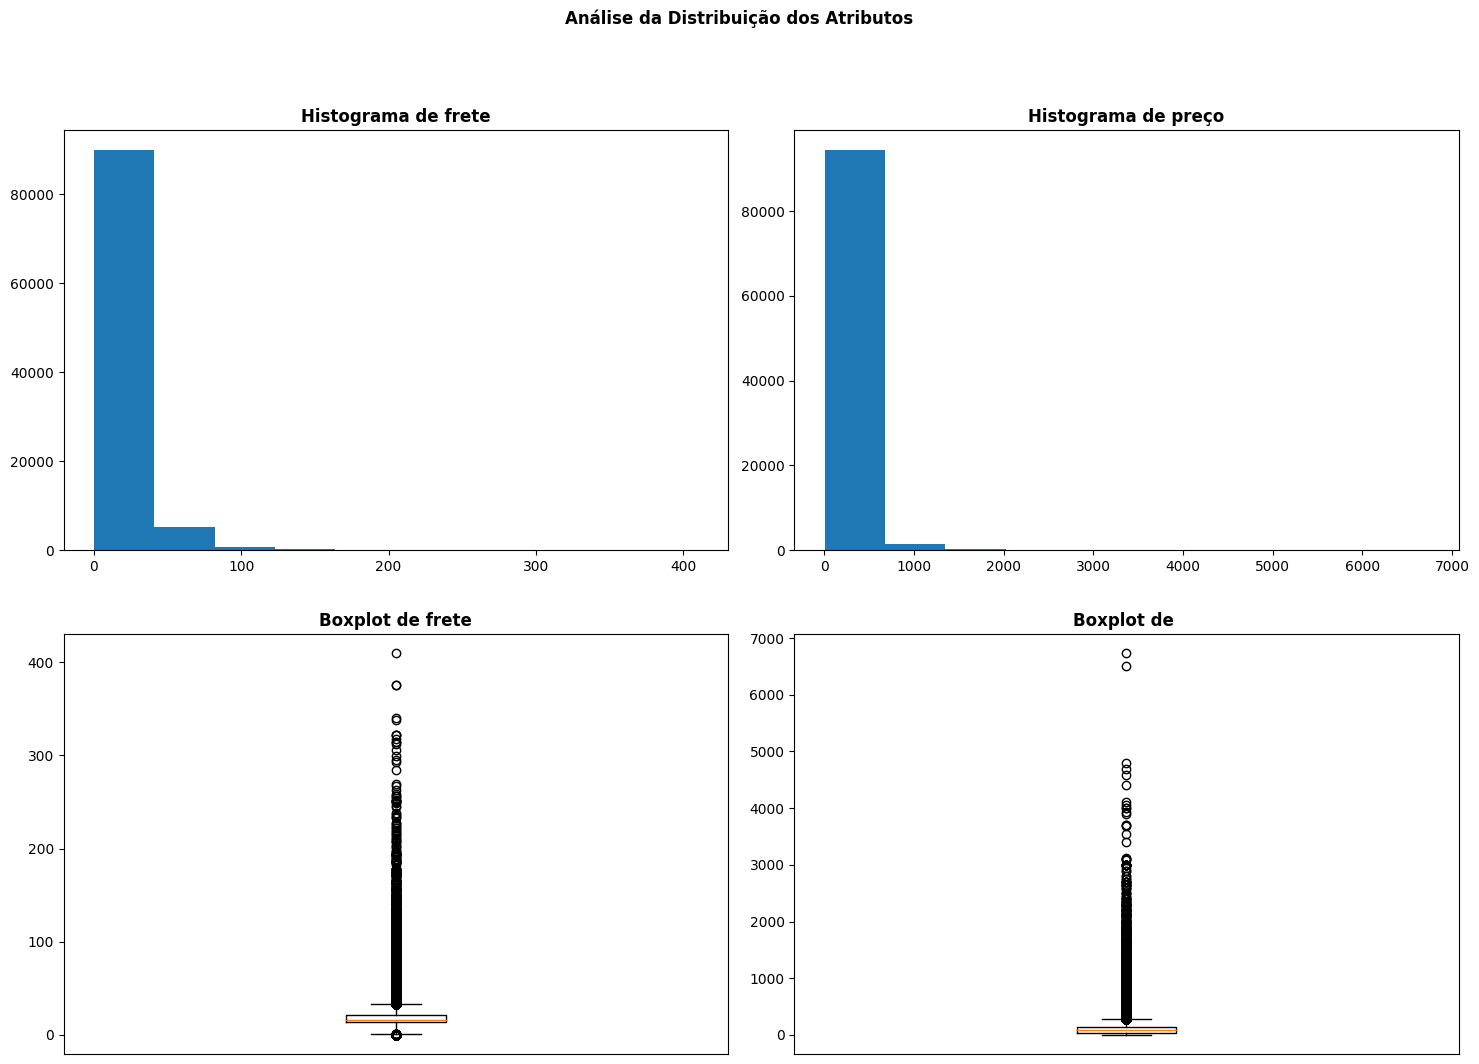

In [40]:
fig = plt.figure(figsize=(18,12))
fig.suptitle('Análise da Distribuição dos Atributos', fontweight='bold')

#Criação dos subplots
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


#Histogramas
ax1.hist(quanti['freight_value'])
ax1.set_title('Histograma de frete', fontweight='bold')

ax2.hist(quanti['price'])
ax2.set_title('Histograma de preço', fontweight='bold')


#Boxplots
ax3.boxplot(quanti['freight_value'])
ax3.set_title('Boxplot de frete', fontweight='bold')

ax4.boxplot(quanti['price'])
ax4.set_title('Boxplot de ', fontweight='bold')


#Configurações visuais adicionais
ax3.set_xticks([])
ax4.set_xticks([])
plt.subplots_adjust(wspace=0.1)

Visilmente, parece que os dados não seguem uma distribuição normal e contém uma grande quantidade de outliers.

### Normalização

Optei por normalização e não padronização porque os dados não seguem uma distribuição normal, logo, não irei se ajustar tão bem.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler_minMax = MinMaxScaler()

quali_normalize = scaler_minMax.fit_transform(geral[['price','freight_value','payment_value']])

quali_normalize #ficaram em valores entre 0 e 1

array([[0.00862024, 0.03243995, 0.00528247],
       [0.00817475, 0.04383909, 0.00540469],
       [0.00951122, 0.04474224, 0.00609043],
       ...,
       [0.00269522, 0.03139035, 0.00619288],
       [0.00164089, 0.03121949, 0.0018062 ],
       [0.04286213, 0.06060828, 0.02300266]])

A normalização é usada em pré-processamento de dados quando serão utilizados em algum modelo de machine learning pois uma escala muito grande de valores em uma variável poderia enviesar a acurácia de um modelo. 

In [42]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184097 sha256=0bc5a0cf18cf821d4676bdad3be48c17da2f2fc80e25d14d511f7c3df5a59b2d
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


In [43]:
#ML model
from pyod.models.knn import KNN

In [44]:
detector = KNN() #instanciando o modelo knn (basicamente cálculo entre as distâncias dos preços)
detector.fit(geral[['price','freight_value','payment_value']]) #fittando o modelo

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [45]:
previsoes = detector.labels_
previsoes #se 0, o resgistro não é outlier, se 1, é outlier!

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
np.unique(previsoes, return_counts=True) #9627 registros são outliers!

(array([0, 1]), array([86636,  9627]))

A principal diferença do uso do algoritmo knn é que, pelo boxplot é necessário muito mais da avaliação humana e o número de variáveis é limitado, enquanto o knn faz um cálculo da distância euclidiana entre os registros e pode ser feito com várias variáveis (trazendo uma robustez para o objetivo)

In [47]:
confianca_prev = detector.decision_scores_ #distância de cada registro
confianca_prev

array([0.26981475, 0.14899664, 0.        , ..., 4.26123222, 0.14142136,
       1.06611444])

aqui mostra os resultados das distâncias, é possível verificar que os valores ficam mais em torno de 0 ou 1, o 4 que é mostrado ali já é considerado um outlier entre os dados.

In [48]:
outliers = []
for i in range(len(previsoes)):
  if previsoes[i] == 1:
    outliers.append(i)
#criando de uma lista de outliers

In [49]:
lista_outliers = geral.iloc[outliers]
lista_outliers
#mostrando todos os outliers do dataframe geral levando em consideração o preço, frete e o valor do pagamento

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
7,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.9,35.71,2,voucher,1,20.00,4e58c72bb0373240b2bd9bf84b493a69,1,NaN,o carrinho veio com defeito.,2017-06-27 00:00:00,2017-06-30 14:26:54,2e76c1f2a920153d79cc98b634c50942,delivered,2017-06-05 12:22:19,2017-06-05 14:31:21,2017-06-07 13:09:07,2017-06-26 13:52:03,2017-07-06 00:00:00,0efd4833752113fedce2e7250d49d5ac,53403,paulista,PE,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
10,d829ae9ca5e0a9749f2574b62eb7ac10,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-19 02:56:03,55.9,27.99,1,boleto,1,167.51,fcbfc00f9d9b164703c45ac561257463,5,NaN,NaN,2017-08-08 00:00:00,2017-08-09 00:00:56,a64e11fc5ee980cd9a2f1ac08110bc44,delivered,2017-07-12 12:04:28,2017-07-13 02:56:03,2017-07-14 16:23:42,2017-08-07 17:27:41,2017-08-09 00:00:00,575083d1c98ec2938a00cd179a40f3d2,45810,porto seguro,BA,27277,volta redonda,SP,cool_stuff,54.0,599.0,6.0,530.0,30.0,9.0,14.0,cool_stuff
23,e01371016351ae4493ecbd7a8c5a33f5,1,ec02a5d380128f7a188e9ce8f3ddd832,8444e55c1f13cd5c179851e5ca5ebd00,2018-01-16 10:18:26,131.9,18.54,1,credit_card,1,12.59,9e6f6f58dd3a9c2e2086e60e2694b82c,5,NaN,"Mto bom, recomendo a loja",2018-01-18 00:00:00,2018-01-18 16:35:13,e1a191d6a40b0deefd2d37b132049e56,delivered,2017-12-26 15:29:42,2017-12-28 10:18:26,2018-01-09 19:03:01,2018-01-17 13:51:48,2018-02-19 00:00:00,61ad224fa8a753d3edc80c7703c8e0b6,8330,sao paulo,SP,37584,congonhal,MG,cool_stuff,59.0,599.0,2.0,2275.0,45.0,25.0,18.0,cool_stuff
41,5a65cedc025f607cbdb4c5219f648ae3,1,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-05 11:24:47,42.9,9.94,3,voucher,1,12.84,ccad6a5f22e0e7035d92ce7e4537e7be,1,NaN,Esse parceiro e muito lerdo se eu não fisesse ...,2017-10-10 00:00:00,2017-10-10 21:32:16,9eb85dfb61032b308cd9dafec6fcb3ee,delivered,2017-09-30 11:11:25,2017-09-30 11:24:47,2017-10-06 16:55:18,2017-10-09 17:46:04,2017-10-18 00:00:00,ccd78f91a99ea36a352433913577d3ad,23580,rio de janeiro,RJ,27277,volta redonda,SP,cool_stuff,51.0,471.0,4.0,550.0,27.0,10.0,15.0,cool_stuff
42,62e975f28aa68109d68f92298a9327ac,1,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-31 15:14:19,45.9,16.11,4,voucher,1,20.48,8a67ac3a7e4a7f736f081319df031d84,4,NaN,NaN,2017-11-09 00:00:00,2017-11-13 09:35:05,00ba767af52461bf567696d2a6d2909f,delivered,2017-10-25 14:58:58,2017-10-25 15:14:49,2017-10-27 17:26:55,2017-11-08 20:49:30,2017-11-21 00:00:00,4dfa53e424b44b9dcb3965683078712d,39400,montes claros,MG,27277,volta redonda,SP,cool_stuff,51.0,471.0,4.0,550.0,27.0,10.0,15.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96203,1ce0acf125f1bcd636276dd213363196,1,cc9e875c2df286dbed83efe01191162c,c731d18cea9bf687ffee82a241c25b11,2017-08-04 18:25:20,129.0,26.18,1,credit_card,2,55.18,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,NaN,Recomendo,2017-08-10 00:00:00,2017-08-13 17:29:51,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizo

agora é possível salvar esse arquivo e enviar pro setor de detecção de fraudes analisar com mais cuidado e tomar uma decisão.

## NLP (Natural Language Process)

In [50]:
geral.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,72.19,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [51]:
#função pra criar a variável 'sentimento' - de acordo com a nota do cliente em cada pedido, se 5 ou 4 é positivo, o resto é negativo.
def my_func(row):
    if row['review_score'] == 5:
        val = 'neg'
    elif row['review_score']  == 4:
        val = 'pos'    
    else:
        val = 0
    return val

geral['sentimento'] = geral.apply(my_func, axis=1)
geral.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,sentimento
96258,31a2886d02ad2127bfec204da2e93b66,1,3a96bcbf644a5d390107570628568026,70126eecc6aa1274392a1743866e9678,2018-07-31 10:35:17,19.80,7.40,1,credit_card,1,27.20,4db058a0de16a06db15c4217ce42a426,5,super recomendo,"Chegou muito, muito antes do prazo",2018-07-27 00:00:00,2018-07-31 12:46:34,28738edfba72391be47d697e6e7e5770,delivered,2018-07-25 10:27:00,2018-07-25 10:35:17,2018-07-25 14:53:00,2018-07-27 01:27:37,2018-08-02 00:00:00,e839774c9d31569dba47946296e58b33,11035,santos,SP,6449,barueri,SP,artes_e_artesanato,53.0,529.0,2.0,325.0,27.0,10.0,14.0,arts_and_craftmanship,neg
96259,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,1,credit_card,7,77.50,6b7c670a784ae6d3f17ee1d4b28d197e,5,NaN,NaN,2018-08-04 00:00:00,2018-08-05 22:10:19,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,17201,jau,SP,artes_e_artesanato,53.0,923.0,5.0,1000.0,25.0,25.0,25.0,arts_and_craftmanship,neg
96260,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,1,credit_card,1,84.63,ad0de1dda4fa03e8efb68c481b31ebf8,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,17201,jau,SP,artes_e_artesanato,32.0,660.0,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship,0
96261,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,1,boleto,1,24.69,24e88b5f641a6a3219ce7a730509d570,5,NaN,Excelente,2018-08-28 00:00:00,2018-08-31 00:26:10,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03 00:00:00,428f4721a509be8c52de6ec2900ba918,12305,jacarei,SP,17201,jau,SP,artes_e_artesanato,29.0,654.0,3.0,200.0,16.0,6.0,16.0,arts_and_craftmanship,neg
96262,edcf1e1eeb52381be9388c90152be52d,1,6bb18295cc019bf3b6dc7c773411d530,04ee0ec01589969663ba5967c0e0bdc0,2018-08-27 11:50:47,289.49,24.83,1,credit_card,5,314.32,a6a6d2f97b28e8aca22046635855fe63,5,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25 00:00:00,2018-08-27 16:43:30,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,95910,lajeado,RS,artes_e_artesanato,47.0,1002.0,3.0,1900.0,19.0,16.0,16.0,arts_and_craftmanship,neg


In [52]:
escritas = geral[['review_score','review_comment_title','review_comment_message','sentimento']]
escritas.isnull().sum()
#todos tem o score mas poucos tem comentários

review_score                  0
review_comment_title      84892
review_comment_message    56714
sentimento                    0
dtype: int64

In [53]:
escritas = escritas.dropna() #dropando os na pra não enviesar a variável 'sentimento'

In [54]:
escritas.review_score.value_counts() #maioria com 5 estrelas

5    5377
1    1708
4    1423
3     723
2     437
Name: review_score, dtype: int64

vetorizando os dados pra aplicar técnicas de NLP

In [55]:

vetorizar = CountVectorizer(lowercase = False, max_features=50)
bag_of_words = vetorizar.fit_transform(escritas.review_comment_message.dropna())
bag_of_words.shape

(9668, 50)

In [56]:
#criando uma lista com todas as frases em um lista
todas_palavras = [texto for texto in escritas.review_comment_message.dropna()]
len(todas_palavras)

9668

In [57]:
#juntando as frases em um único elemento
todas_palavras = ' '.join([texto for texto in escritas.review_comment_message.dropna()])
len(todas_palavras)

671315

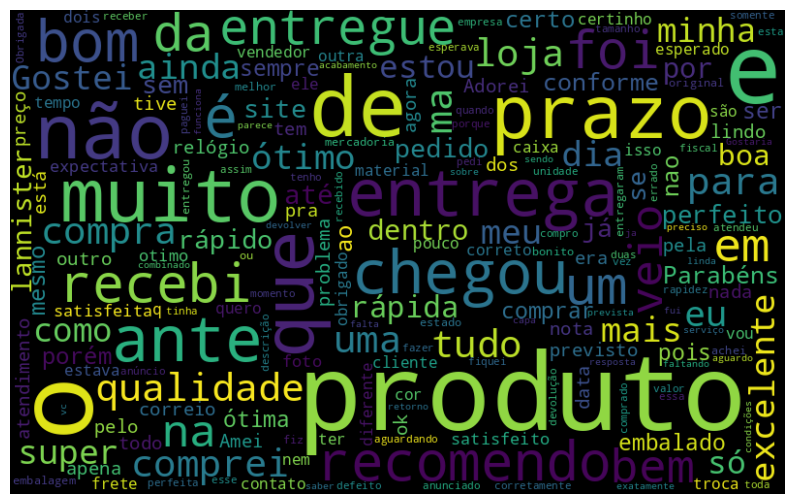

In [58]:
#palavras mais utilizadas em todos os comentários
nuvem_palavras = WordCloud(width=800, height=500, collocations=False,
                           max_font_size = 110).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [59]:
#palavras mais utilizadas em comentários negativos

def nuvem_palavras_neg(texto, coluna_texto):
  texto_negativo = texto.query('sentimento == "neg"')  
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
  
  nuvem_palavras = WordCloud(width=800, height=500, collocations=False,
                            max_font_size = 110).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  
  plt.show()

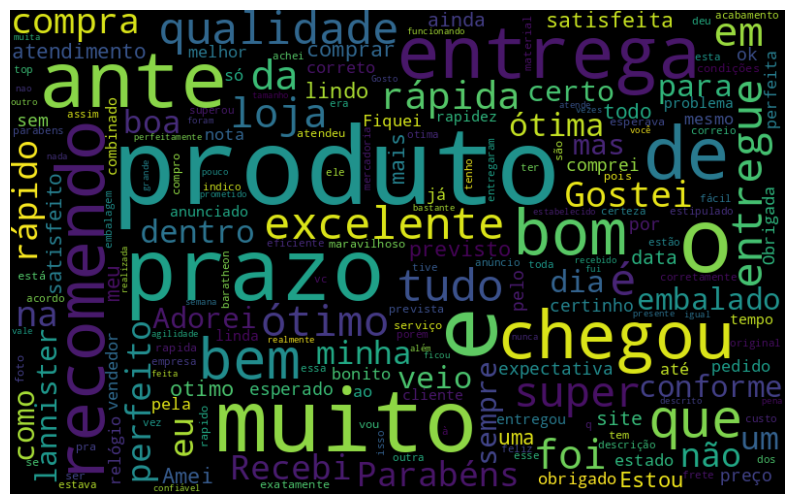

In [60]:
nuvem_palavras_neg(escritas, 'review_comment_message')

In [61]:
#palavras mais utilizadas em palavras positivas
def nuvem_palavras_pos(texto, coluna_texto):
  texto_positivo = texto.query('sentimento == "pos"')  
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, collocations=False,
                            max_font_size = 110).generate(todas_palavras)
  
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  
  plt.show()

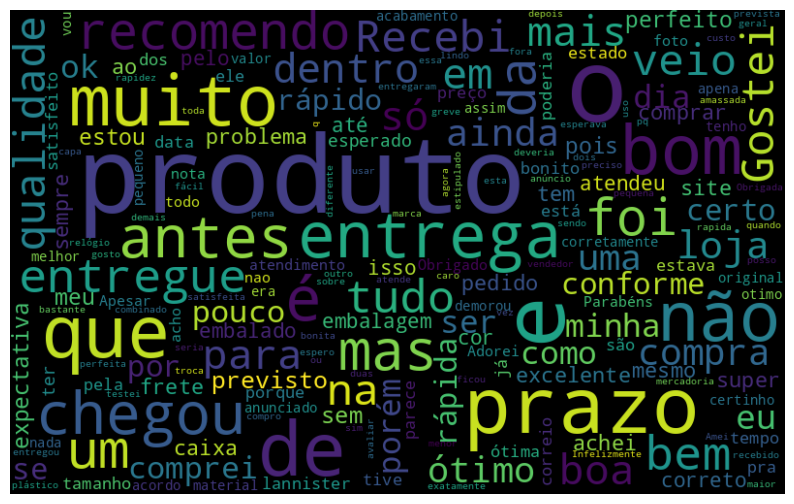

In [62]:
nuvem_palavras_pos(escritas, 'review_comment_message')

## Tabela de distribuição de frequência e heatmap

In [63]:
quali.payment_type.value_counts()

credit_card    73045
boleto         19161
voucher         2573
debit_card      1484
Name: payment_type, dtype: int64

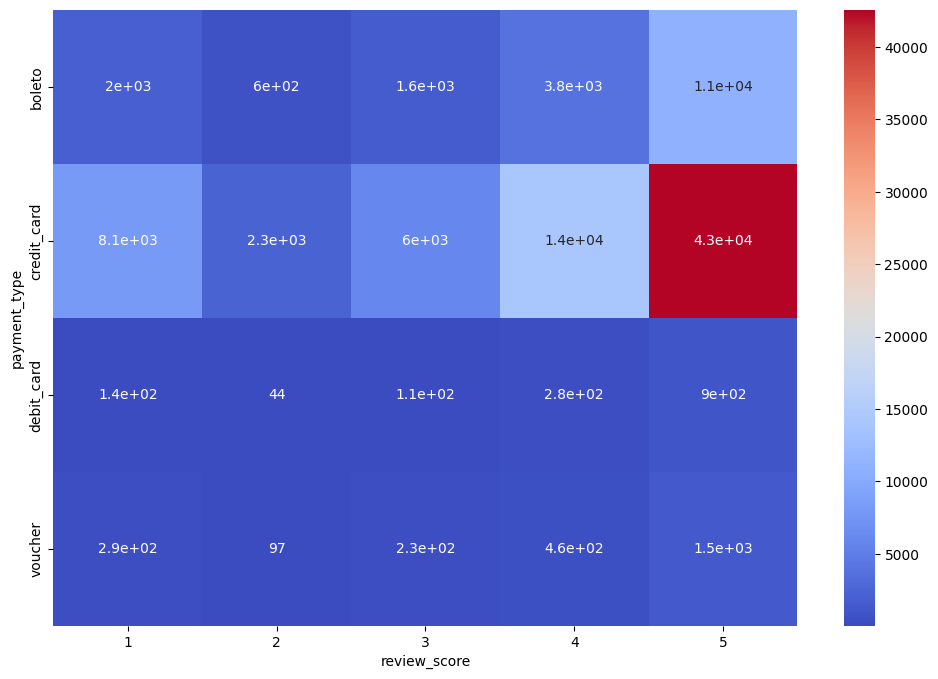

In [64]:
contigency = pd.crosstab(geral['payment_type'], geral['review_score']) 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap='coolwarm'); #quantidade de clientes por tipo de pagamento e score

In [65]:
contigency #tabela de frequência entre as variáveis quantitativas

review_score,1,2,3,4,5
payment_type,,,,,
boleto,2034,595,1650,3786,11096
credit_card,8059,2270,5964,14176,42576
debit_card,143,44,113,279,905
voucher,291,97,227,456,1502


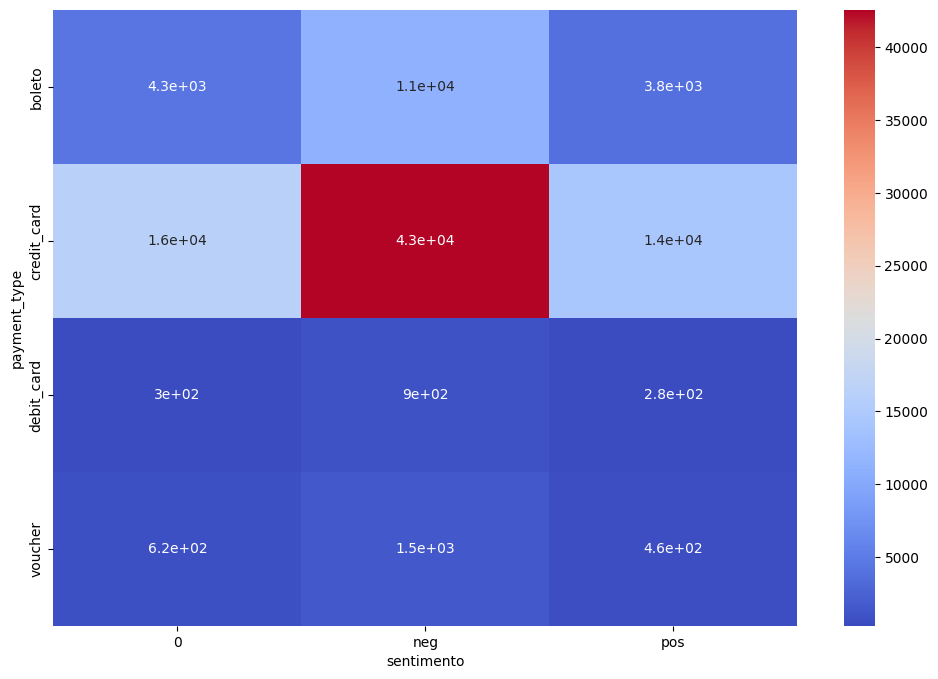

In [66]:
contigency = pd.crosstab(geral['payment_type'], geral['sentimento']) 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap='coolwarm'); #quantidade de clientes por tipo de pagamento e sentimento

In [69]:
contigency[['neg','pos']] #tabela de frequência entre as variáveis quantitativas

sentimento,neg,pos
payment_type,,
boleto,11096,3786
credit_card,42576,14176
debit_card,905,279
voucher,1502,456


# Outras ideias

dá pra criar a variável 'região' e verificar em quais regiões estão a maior parte dos clientes e quais tem menos e assim aplicar alguma campanha de marketing no local.

e um pensamento semelhante serve pra região do vendedor, pra entender onde tem mais e onde tem menos e tomar alguma atitude em relação a isso.